In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_mass_profile(f):
    file = h5py.File(f, 'r')

    Subhalo=file.get('Subhalo')
    SubhaloMass=np.array(Subhalo['SubhaloMass'])
    SubhaloMass=10**10*SubhaloMass #converting to solar masses

    #Get Redshift, boxsize, n_particle
    Redshift="{:.2e}".format(file['Header'].attrs['Redshift'])
    Boxsize=int((file['Header'].attrs['BoxSize']))

    a=min(SubhaloMass)/2
    Mass_Bins=[]
    i=1
    while a<max(SubhaloMass):
        Mass_Bins.append(a)
        a=np.power(2,i/2)*min(SubhaloMass)
        i=i+1

    i=0
    j=0
    N_halo=[]
    for i in range(0,len(Mass_Bins)):
        array=[]
        for j in range(0,len(SubhaloMass)):
                if SubhaloMass[j]>Mass_Bins[i]:
                    array.append(SubhaloMass[j])
        N_halo.append(len(array))
        
    return Mass_Bins, N_halo

In [3]:
def get_mvel_profile(f):
    file = h5py.File(f, 'r')

    Subhalo=file.get('Subhalo') #Subhalo is the group, SubhaloVMas is the dataset inside the group
    SubhaloVMax=np.array(Subhalo['SubhaloVmax']) #km/s

    #for naming the plot properly
    name=str(file)
    snap_num=name[28:31]
    #Get Redshift, boxsize, n_particle
    Redshift="{:.2e}".format(file['Header'].attrs['Redshift'])
    Boxsize=int((file['Header'].attrs['BoxSize']))


    #Take Absolute Values of the velocities

    MaxVel=[]
    AbsVel=0
    for i in range(0,len(SubhaloVMax)):
        AbsVel=np.absolute(SubhaloVMax[i])
        MaxVel.append(AbsVel)

    #Gotta Create a maximum velocity bin

    a=0.5*min(MaxVel)
    MaxVel_Bin=[]
    while a<max(MaxVel):
        MaxVel_Bin.append(a)
        a=np.power(a,1.01)+a/5

    #Doing the magic here

    N_halo=[]
    i=0
    k=0
    for i in range(0,len(MaxVel_Bin)):
        TempArray=[]
        for k in range(0,len(MaxVel)):
                if MaxVel[k]> MaxVel_Bin[i]:
                    TempArray.append(MaxVel)

        N_halo.append(len(TempArray))
    return MaxVel_Bin, N_halo

In [4]:
path = '/home/ryan/Data/Data0/snaps/run_gevolution_L3N256/'
fname = 'fof_subhalo_tab_000.hdf5'

f = path + fname

gr_mbins, gr_m = get_mass_profile(f)

gr_vbins, gr_v = get_mvel_profile(f)

In [5]:
file = h5py.File(f, 'r')
Redshift="{:.2e}".format(file['Header'].attrs['Redshift'])
Boxsize=int((file['Header'].attrs['BoxSize']))

In [6]:
path = '/home/ryan/Data/Data0/snaps/run_CDM_L3N256_DM_lower_softening/'
fname = 'fof_subhalo_tab_007.hdf5'

f = path + fname

an_mbins, an_m = get_mass_profile(f)

an_vbins, an_v = get_mvel_profile(f)

In [11]:
path = '/home/ryan/Data/Data0/snaps/run_gevolution_L3N256_Newton/'
fname = 'fof_subhalo_tab_000.hdf5'

f = path + fname

gn_mbins, gn_m = get_mass_profile(f)
gn_vbins, gn_v = get_mvel_profile(f)

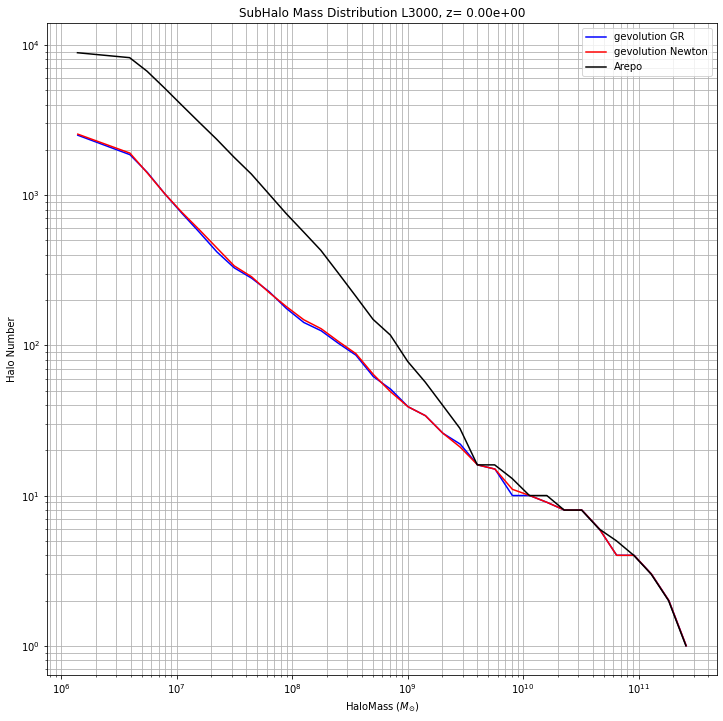

In [15]:
plt.figure(figsize=[12,12])
plt.plot(gr_mbins, gr_m, label="gevolution GR", color='b')
plt.plot(gn_mbins, gn_m, label='gevolution Newton', color='r')
plt.plot(an_mbins, an_m, label="Arepo", color='k')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.grid(True, which="both", ls="-")

plt.title('SubHalo Mass Distribution L'+str(Boxsize)+', z= '+Redshift)
plt.xlabel("HaloMass ($M_{\odot}$)")
plt.ylabel("Halo Number")


output_filename=('SubHalo_Mass_Distribution_L'+str(Boxsize)+'_z_'+Redshift+'.png')
plt.savefig(output_filename)
plt.show()

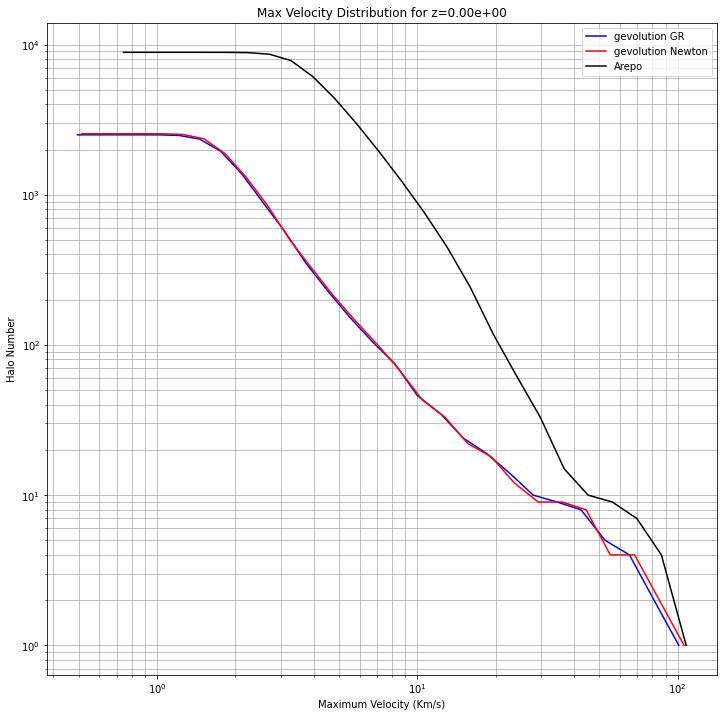

In [16]:
#plot Stuff
plt.figure(figsize=[12,12])
plt.plot(gr_vbins, gr_v, label='gevolution GR', color='b')
plt.plot(gn_vbins, gn_v, label='gevolution Newton', color='r')
plt.plot(an_vbins, an_v, label='Arepo', color='k')

plt.yscale("log")
plt.xscale("log")

plt.grid(True, which="both", ls="-")

plt.title("Max Velocity Distribution for z="+Redshift)
plt.xlabel("Maximum Velocity (Km/s)")
plt.ylabel("Halo Number")
plt.legend()

output_filename = 'MaxVelocityProfile_L'+str(Boxsize)+'_z_'+Redshift+'.png'
plt.savefig(output_filename)

plt.show()